<center><h1>Prueba Práctica 2</h1></center>

<h3>Nombre: Christian Pillaga S</h3>

#### Enunciado

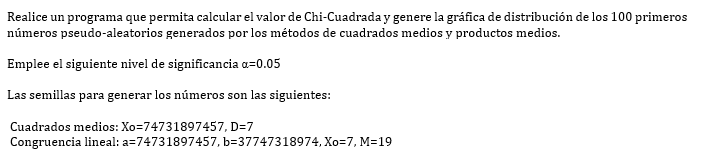

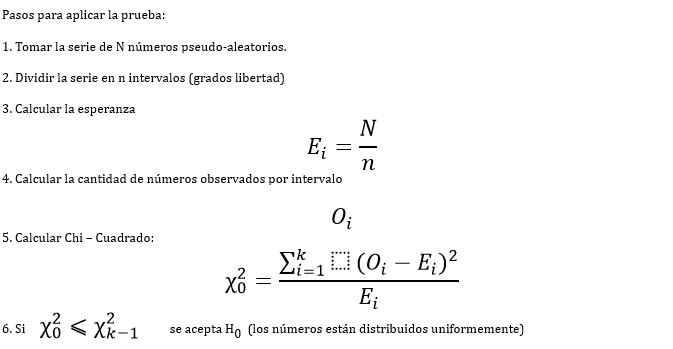

1. Primero importamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
import math as mt


%matplotlib inline

2. Creamos los métodos

In [2]:
def congLineal(x, a, c, mod, iters):
    num = 0.00
    lista =[]
    for i in range(iters):
        x = (a * x + c) % mod
        num = round(x/mod,2)
        lista.append(num)
    return lista

In [3]:
def get_pos(digs):
    val1 =0
    val2 =0
    if digs%2 !=0:
        val1 = int(digs/2)
        val2 = int(digs/2)+1
    else:
        val1 = int(digs/2)
        val2 = val1
    return val1,val2

In [4]:
def cuadMedios(iters, val, digs):
    lista =[]
    x0_semilla = int(val)
    aum = get_pos(digs)
    for i in range(iters):
        xn2= x0_semilla**2
        lon = len(str(xn2))
        ui = str(xn2)[int(lon/2)-aum[0]:int(lon/2)+aum[1]]
        rn = round(int(ui)/10**digs,2)
        lista.append(rn)
        x0_semilla=int(ui)
    return lista

In [5]:
def lista(num_grupos, aumento, lista):
    grupos = []
    ini=0.00
    for i in range(num_grupos+1):
        grupos.append(round(ini,2))
        ini=ini+aumento
    a=0
    b=1
    rangos={}
    for i in range(len(grupos)-1):
        inf=grupos[a]
        sup=grupos[b]
        rangos.update({str(inf)+"," +str(sup):[]})
        for i in lista:
            if i==0.00:
                if i >=inf and i <=sup:
                    rangos[str(inf)+","+str(sup)].append(i)
            else:
                if i >inf and i <=sup:
                    rangos[str(inf)+","+str(sup)].append(i)
        a=b
        b=a+1
    return rangos

In [6]:
def chi_cuadrado(listap, valor):
    n = int(mt.sqrt(len(listap)))
    dic = lista(n,1/n, listap)
    suma = 0.00
    
   
    print(" Intervalo ", "      Ei ", "       Oi ", " (Oi-Ei)^2/Ei")
    for x, it in enumerate(dic.items()):
        f = ((len(it[1])-n)**2)/n
        suma+=f
        print(x, "         ", "  ("+it[0]+")     ", len(it[1]),"     ", f)
    
    plt.hist(listap)
    plt.ylabel('Frecuencia')
    plt.xlabel('Valor X')
    plt.title('Chi cuadrado')
    plt.show()
    
    print("Suma: ",suma)
    
    if suma < valor:
        return "Respuesta chi cuadrado: ", suma, " = ", valor, " => ",  True
    else:
        return "Respuesta chi cuadrado: ", suma, " = ", valor, " => ", False


----------------------------------
  Chi cuadrado cuadrados medios
----------------------------------

 Intervalo        Ei         Oi   (Oi-Ei)^2/Ei
0             (0.0,0.1)      11       0.1
1             (0.1,0.2)      18       6.4
2             (0.2,0.3)      12       0.4
3             (0.3,0.4)      7       0.9
4             (0.4,0.5)      13       0.9
5             (0.5,0.6)      9       0.1
6             (0.6,0.7)      7       0.9
7             (0.7,0.8)      5       2.5
8             (0.8,0.9)      8       0.4
9             (0.9,1.0)      10       0.0


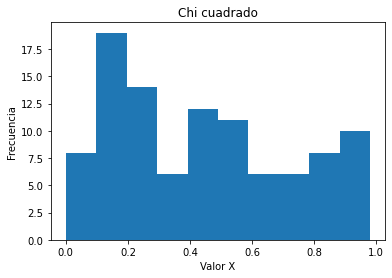

Suma:  12.600000000000001
('Respuesta chi cuadrado: ', 12.600000000000001, ' = ', 16.9, ' => ', True)

----------------------------------
 Chi cuadrado congruencia lineal
----------------------------------

 Intervalo        Ei         Oi   (Oi-Ei)^2/Ei
0             (0.0,0.1)      11       0.1
1             (0.1,0.2)      11       0.1
2             (0.2,0.3)      0       10.0
3             (0.3,0.4)      22       14.4
4             (0.4,0.5)      0       10.0
5             (0.5,0.6)      0       10.0
6             (0.6,0.7)      11       0.1
7             (0.7,0.8)      11       0.1
8             (0.8,0.9)      23       16.9
9             (0.9,1.0)      11       0.1


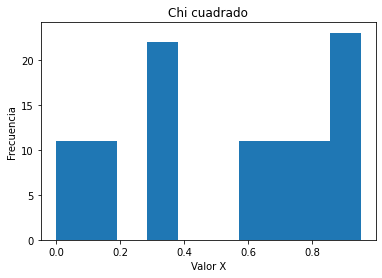

Suma:  61.800000000000004
('Respuesta chi cuadrado: ', 61.800000000000004, ' = ', 16.9, ' => ', False)


In [7]:
def main():
    valor = 16.9
    iters = 100
    
    print("")
    print("----------------------------------")
    print("  Chi cuadrado cuadrados medios")
    print("----------------------------------")
    print("")
    
    cm_d = 7
    cm_xo = 74731897457 
    
    arreglo = cuadMedios(iters, cm_xo, cm_d)
    res=chi_cuadrado(arreglo,valor) 
    print(res)
    
    print("")
    print("----------------------------------")
    print(" Chi cuadrado congruencia lineal")
    print("----------------------------------")
    print("")
      
    cl_xo = 7 
    cl_a = 74731897457 
    cl_b = 37747318974 
    cl_m = 19
    
    arreglo2 = congLineal(cl_xo, cl_a, cl_b, cl_m, iters)
    res2 = chi_cuadrado(arreglo2,valor)
    
    print(res2)
    
if __name__ == "__main__":
    main()